<a href="https://colab.research.google.com/github/metsumesquita/master_degree_UPE/blob/main/Hybrid_Model_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Escrever o artigo no overleaf ‚Åâ[overleaf_artigo](https://pt.overleaf.com/9677853253txwnpcyrdcmg#ce7095)

In [ ]:
#Dataset que j√°e est√£o certos
#-Exchange rate
#-The sunspot (o nosso vai ate 1988)
#the Canadian lynx


#dataset que foram usados

#Exchange rate: foi passada pelo pr√≥prio khashei (o autor do artigo que est√°s usando como base) para a gente.
# The exchange rate data set used in this paper contains weekly observations from 1980 to 1993
#https://github.com/metsumesquita/master_degree_UPE/blob/main/Datasets/US-UK.csv

#-The sunspot data considered in this paper include the annual number of sunspot from 1700 to 1987()

#the Canadian lynx annual record of the number of Canadian lynx from 1821 to 1934
#https://github.com/metsumesquita/master_degree_UPE/blob/main/Datasets/lynx.csv

#Falta ??

#nao sei se os dados entao todo certos
#The closing Nikkei 225 index (N225) data set covers daily stock prices from 2006/03/03 to 2010/04/01

#Unico artigo que falta
#- wind speed data in Colorado State are used for simulating series hybrid models.


"""
---
mas como a maioria desses dataset s√£o amplamente usamos normalmente nao precisam de grande tratamento , colocaremos a normaliza√ß√£o entre 1 e 0,
o janelamento pode receber um melhoramento escolhando a melhor lag
deve ser feita o salvamento de cada previsao que for feita e tambem de cada execu√ß√£o
deve ser feita uma compara√ß√£o entre o modelo antes do algoritmo de melhorando para os parametros e depois da utiliza√ß√£o de algoritmos geneticos

deve focar primeiramente na cria√ßao dos modelos por ser algo mais trabalhoso e demorado do que o resto do projeto

alem disso existem muitas formas de realizar a combin√ßao de modelos como por exemplo o modelo de pondera√ßao
o modelo de fun√ßao o modelo de combina√ßao utilizando knn,e alem disso temos formas de sel√ßao como a sele√ßao dinmaica (DYN), a do oraculo ou oracle
e tambem o do pior modelo

- importante criar omodelo primeiro
ARIMA‚ÄìMLP
ARIMA-SVM
MLP‚ÄìARIMA
SVM-ARIMA


ao utilizamos as metricas MAE,MSE ou RMAE , deve ser explicado o uso / defender ele e dar algum tipo de base (ref de artigo paper)

tambem podemos utilizar o github dispobinizado pelo professor domingos


https://github.com/domingos108/hybrid_system_forecast/blob/master/additive_hybrid_model_mlp.ipynb
"""


'\n---\nmas como a maioria desses dataset s√£o amplamente usamos normalmente nao precisam de grande tratamento , colocaremos a normaliza√ß√£o entre 1 e 0,\no janelamento pode receber um melhoramento escolhando a melhor lag\ndeve ser feita o salvamento de cada previsao que for feita e tambem de cada execu√ß√£o\ndeve ser feita uma compara√ß√£o entre o modelo antes do algoritmo de melhorando para os parametros e depois da utiliza√ß√£o de algoritmos geneticos\n\ndeve focar primeiramente na cria√ßao dos modelos por ser algo mais trabalhoso e demorado do que o resto do projeto\n\nalem disso existem muitas formas de realizar a combin√ßao de modelos como por exemplo o modelo de pondera√ßao\no modelo de fun√ßao o modelo de combina√ßao utilizando knn,e alem disso temos formas de sel√ßao como a sele√ßao dinmaica (DYN), a do oraculo ou oracle\ne tambem o do pior modelo\n\n- importante criar omodelo primeiro\nARIMA‚ÄìMLP\nARIMA-SVM\nMLP‚ÄìARIMA\nSVM-ARIMA\n\n\nao utilizamos as metricas MAE,MSE ou R

In [ ]:
"""
combinador treinavel
rede neural pode der aplicado
svm
recregssao linear
meta learning
stackling

#https://www.sciencedirect.com/science/article/abs/pii/S0925231211004504

compara√ß√£o com outros assemplys
otimiza√ß√£o de sistemas hibridos utilizando pso ou algoritmos geneticos
https://robjhyndman.com/papers/fforms.pdf

precisa fazer o assembly ?
combiniing pattern classifirrer methdos e algorithm
giorgio ciacinto

conferencia PAMI

#https://eprints.bournemouth.ac.uk/11186/1/Neurocomputing_Lemke_Gabrys_2009_accepted.pdf


"""

'\ncombinador treinavel\nrede neural pode der aplicado\nsvm\nrecregssao linear\nmeta learning\nstackling\n\n#https://www.sciencedirect.com/science/article/abs/pii/S0925231211004504\n\ncompara√ß√£o com outros assemplys\notimiza√ß√£o de sistemas hibridos utilizando pso ou algoritmos geneticos\nhttps://robjhyndman.com/papers/fforms.pdf\n\nprecisa fazer o assembly ?\ncombiniing pattern classifirrer methdos e algorithm\ngiorgio ciacinto\n\nconferencia PAMI\n\n#https://eprints.bournemouth.ac.uk/11186/1/Neurocomputing_Lemke_Gabrys_2009_accepted.pdf\n\n\n'

#instala√ß√µes e importa√ß√µes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras as ks
import tensorflow as tf


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:

from pandas.plotting import autocorrelation_plot
from sklearn.linear_model import LinearRegression

from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

#carregamento dos conjuntos

In [ ]:
url_1 = "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE/main/Datasets/sunspot.csv"
sunpot_data = pd.read_csv(url_1)

url_2= "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE//main/Datasets/US-UK.csv"
exchange_data= pd.read_csv(url_2)

url_3= "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE/main/Datasets/lynx.csv"
lynx_data= pd.read_csv(url_3)

url_4= "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE/main/Datasets/nikkei225.csv"
nikkei225_data= pd.read_csv(url_4)

#lynx
####the Canadian lynx annual record of the number of Canadian lynx from 1821 to 1934

In [9]:
#lynx
lynx_data.head()

year  value
0  1821    269
1  1822    321
2  1823    585
3  1824    871
4  1825   1475

In [10]:
lynx_data.tail()

year  value
109  1930    662
110  1931   1000
111  1932   1590
112  1933   2657
113  1934   3396

In [11]:
lynx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    114 non-null    int64
 1   value   114 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [12]:
print(lynx_data.index)
print(type(lynx_data.index))

RangeIndex(start=0, stop=114, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>


In [13]:
# Corrigir para 'to_datetime' e passar a coluna corretamente
lynx_data["year"] = pd.to_datetime(lynx_data["year"], format="%Y")

# Definir 'year' como √≠ndice
lynx_data.set_index("year", inplace=True)

# Se o √≠ndice for do tipo PeriodIndex, converta para Timestamp
if isinstance(lynx_data.index, pd.PeriodIndex):
    lynx_data.index = lynx_data.index.to_timestamp()


In [14]:

# Ordenar os dados por data (boa pr√°tica)
lynx_data=lynx_data.sort_index()

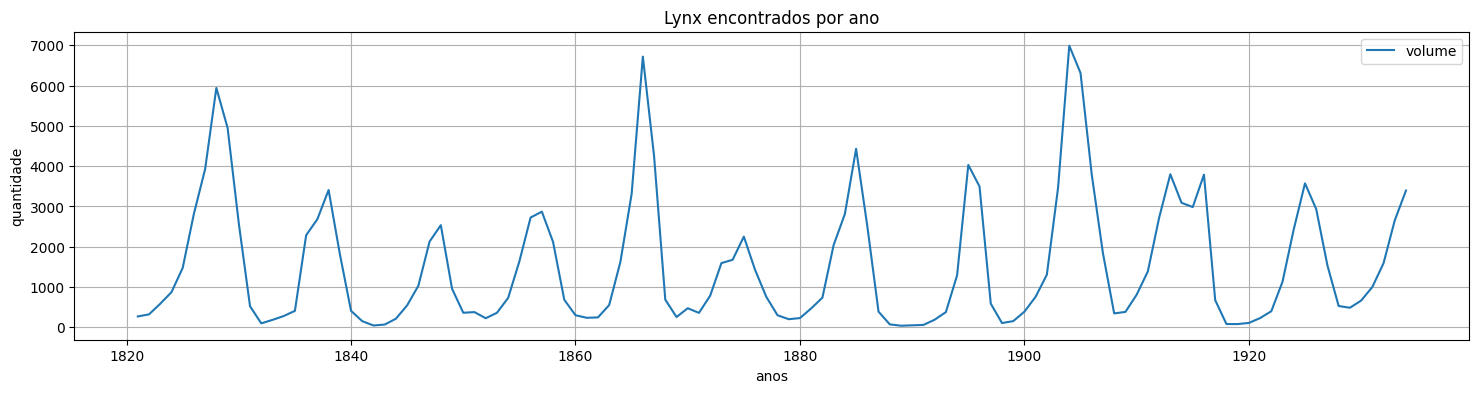

In [15]:
plt.figure(figsize=(18, 4))
plt.plot(lynx_data.index, lynx_data["value"], label='volume')
plt.title("Lynx encontrados por ano")
plt.xlabel("anos")
plt.ylabel("quantidade")
plt.grid(True)
plt.legend()
plt.show()


#sunpot
####The sunspot data considered in this paper include the annual number ofsunspot from 1700 to 1987

In [16]:
#sunpot
print("primeiros anos registrados")
sunpot_data.head()

primeiros anos registrados


year  value
0  1700    5.0
1  1701   11.0
2  1702   16.0
3  1703   23.0
4  1704   36.0

In [17]:
print("ultimos anos registrados")
sunpot_data.tail()

ultimos anos registrados


year  value
284  1984   45.9
285  1985   17.9
286  1986   13.4
287  1987   29.2
288  1988  100.2

In [18]:
sunpot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    289 non-null    int64  
 1   value   289 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.6 KB


In [19]:
print(sunpot_data.index)
print(type(sunpot_data.index))

RangeIndex(start=0, stop=289, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>


In [20]:
# Converter a coluna 'year' para datetime no formato de ano
sunpot_data["year"] = pd.to_datetime(sunpot_data["year"], format="%Y", errors='coerce')

# Definir 'year' como √≠ndice
sunpot_data.set_index("year", inplace=True)

# Garantir que o √≠ndice seja datetime (Timestamp), n√£o Period
if isinstance(sunpot_data.index, pd.PeriodIndex):
    sunpot_data.index = sunpot_data.index.to_timestamp()

# Ordenar os dados por data (boa pr√°tica)
sunpot_data = sunpot_data.sort_index()


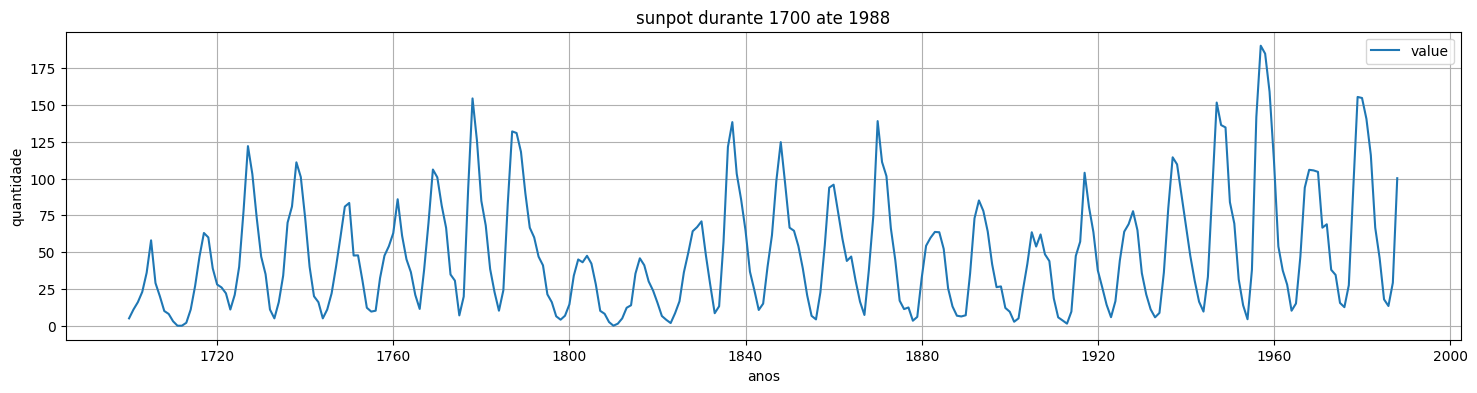

In [21]:
plt.figure(figsize=(18, 4))
plt.plot(sunpot_data.index,sunpot_data["value"], label='value')
plt.title("sunpot durante 1700 ate 1988")
plt.xlabel("anos")
plt.ylabel("quantidade")
plt.grid(True)
plt.legend()
plt.show()


#exchange rate
####The exchange rate data set used in this paper contains weekly observations from 1980 to 1993

In [22]:
#exchange
exchange_data.head()
exchange_data.tail()

observation_date  DEXUSUK
725       1993-11-27   1.4795
726       1993-12-04   1.4900
727       1993-12-11   1.4945
728       1993-12-18   1.4910
729       1993-12-25   1.5030

In [23]:
exchange_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  730 non-null    object 
 1   DEXUSUK           730 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.5+ KB


In [24]:
# Corrigir para 'to_datetime' e passar a coluna corretamente
#weekly observations from 1980 to 1993
exchange_data["observation_date"] = pd.to_datetime(exchange_data["observation_date"])
exchange_data.set_index("observation_date", inplace=True)

# Caso seja PeriodIndex (pouco comum nesse tipo de dado), converter:
if isinstance(exchange_data.index, pd.PeriodIndex):
    exchange_data.index = exchange_data.index.to_timestamp()


# Ordenar os dados por data (boa pr√°tica)
exchange_data = exchange_data.sort_index()


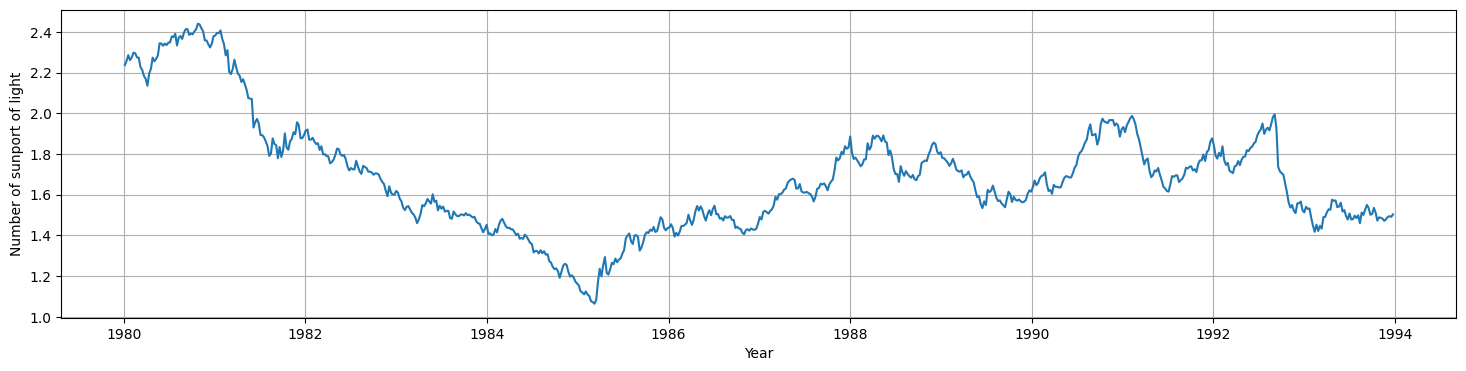

In [25]:
plt.figure(figsize=(18, 4))
plt.plot(exchange_data.index,exchange_data["DEXUSUK"], label='DEXUSUK')
plt.plot(title="DEXUSUK observa√ß√µes semanais do ano de 1980 ate 1993 ")
plt.xlabel("Year")
plt.ylabel("Number of sunport of light")
plt.grid(True)
plt.show()

#nikkie225
>
The closing Nikkei 225 index (N225) data set covers daily stock
prices from 2006/03/03 to 2010/04/01

In [26]:
nikkei225_data.head()

date         value
0  2006-03-03  15663.339844
1  2006-03-06  15901.160156
2  2006-03-07  15726.019531
3  2006-03-08  15627.490234
4  2006-03-09  16036.910156

In [27]:
nikkei225_data.tail()

date         value
995  2010-03-26  10996.370117
996  2010-03-29  10986.469727
997  2010-03-30  11097.139648
998  2010-03-31  11089.940430
999  2010-04-01  11244.400391

In [28]:
nikkei225_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1000 non-null   object 
 1   value   1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [29]:
# Corrigir para 'to_datetime' e passar a coluna corretamente
#2006/03/03 to 2009/06/05
nikkei225_data["date"] = pd.to_datetime(nikkei225_data["date"])
nikkei225_data.set_index("date", inplace=True)

# Caso seja PeriodIndex (pouco comum nesse tipo de dado), converter:
if isinstance(nikkei225_data.index, pd.PeriodIndex):
    nikkei225_data.index = nikkei225_data.index.to_timestamp()

# Ordenar os dados por data (boa pr√°tica)
nikkei225_data =nikkei225_data.sort_index()

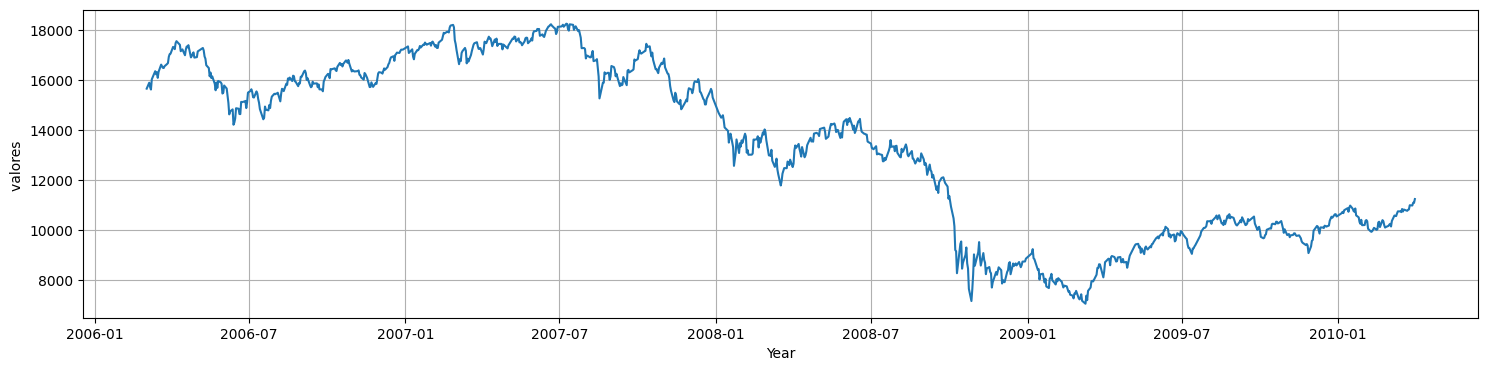

In [32]:
plt.figure(figsize=(18, 4))
plt.plot(nikkei225_data.index,nikkei225_data["value"], label='valores')
plt.plot(title="nikkie 225 ,bolsa de valores 2006/03/03 ate 2010/04/01")
plt.xlabel("Year")
plt.ylabel("valores ")
plt.grid(True)
plt.show()

#estacionalidade para todo os conjuntos


In [33]:
from statsmodels.tsa.stattools import adfuller

def testar_estacionaridade_univariada(dataframes, nomes=None, max_diff=3):
    for i, df in enumerate(dataframes):
        nome = nomes[i] if nomes else f"S√©rie {i+1}"
        col = df.columns[0]
        serie = df[col].dropna()

        print(f"\nüìä An√°lise de Estacionaridade - {nome}")
        print(f"Coluna analisada: {col}")

        # ADF na s√©rie original
        adf_result = adfuller(serie)
        print(f"\nüîç S√©rie Original:")
        print(f"  ADF Statistic: {adf_result[0]:.4f}")
        print(f"  p-value: {adf_result[1]:.4f}")

        if adf_result[1] < 0.05:
            print("  ‚úÖ A s√©rie √© estacion√°ria. N√£o ser√° diferenciada.")
            continue  # N√£o precisa diferenciar
        else:
            print("  ‚ùå A s√©rie N√ÉO √© estacion√°ria. Tentando diferencia√ß√µes...")

        # Diferencia√ß√£o sucessiva
        d = 1
        serie_diff = serie.diff().dropna()
        while d <= max_diff:
            adf_diff = adfuller(serie_diff)
            print(f"\nüîÅ S√©rie Diferenciada ({d}¬™ ordem):")
            print(f"  ADF Statistic: {adf_diff[0]:.4f}")
            print(f"  p-value: {adf_diff[1]:.4f}")
            if adf_diff[1] < 0.05:
                print(f"  ‚úÖ A s√©rie diferenciada ({d}) √© estacion√°ria.")
                break
            else:
                print(f"  ‚ùå A s√©rie diferenciada ({d}) ainda N√ÉO √© estacion√°ria.")
                serie_diff = serie_diff.diff().dropna()
                d += 1

        if d > max_diff:
            print(f"‚ö†Ô∏è A s√©rie n√£o se tornou estacion√°ria ap√≥s {max_diff} diferencia√ß√µes.")




In [34]:
list_data = [exchange_data, sunpot_data, lynx_data,nikkei225_data]
nomes_series = ["Exchange Rate", "Sunspot", "Lynx Trappings",'The closing Nikkei 225']

testar_estacionaridade_univariada(list_data, nomes_series)



üìä An√°lise de Estacionaridade - Exchange Rate
Coluna analisada: DEXUSUK

üîç S√©rie Original:
  ADF Statistic: -1.9903
  p-value: 0.2908
  ‚ùå A s√©rie N√ÉO √© estacion√°ria. Tentando diferencia√ß√µes...

üîÅ S√©rie Diferenciada (1¬™ ordem):
  ADF Statistic: -26.1380
  p-value: 0.0000
  ‚úÖ A s√©rie diferenciada (1) √© estacion√°ria.

üìä An√°lise de Estacionaridade - Sunspot
Coluna analisada: value

üîç S√©rie Original:
  ADF Statistic: -2.3842
  p-value: 0.1462
  ‚ùå A s√©rie N√ÉO √© estacion√°ria. Tentando diferencia√ß√µes...

üîÅ S√©rie Diferenciada (1¬™ ordem):
  ADF Statistic: -14.0761
  p-value: 0.0000
  ‚úÖ A s√©rie diferenciada (1) √© estacion√°ria.

üìä An√°lise de Estacionaridade - Lynx Trappings
Coluna analisada: value

üîç S√©rie Original:
  ADF Statistic: -2.9963
  p-value: 0.0352
  ‚úÖ A s√©rie √© estacion√°ria. N√£o ser√° diferenciada.

üìä An√°lise de Estacionaridade - The closing Nikkei 225
Coluna analisada: value

üîç S√©rie Original:
  ADF Statistic: -1

In [36]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def gerar_graficos_temporais(df, titulo):
    col = df.columns[0]
    serie = df[col]

#para os conjuntos nikkie e exchange
    # Reamostragem mensal (se fizer sentido para a s√©rie)
    if df.index.inferred_freq not in ['M', 'MS']:
        serie_mensal = serie.resample('M').mean()
    else:
        serie_mensal = serie

    cleaned_series = serie.dropna()

    plt.figure(figsize=(15, 18))

#para o conjunto sunpot e lynx que sao dados anuais talvez seja melhor feito por semestre ?




    # 1. S√©rie original
    plt.subplot(4, 1, 1)
    plt.plot(serie, color='blue')
    plt.title(f'{titulo} - S√©rie Original')
    plt.xlabel('Data')
    plt.ylabel(col)
    plt.grid(True)

    # 2. M√©dia mensal
    plt.subplot(4, 1, 2)
    plt.plot(serie_mensal, color='green')
    plt.title(f'{titulo} - M√©dia Mensal')
    plt.xlabel('Data')
    plt.ylabel(col)
    plt.grid(True)

    # 3. ACF
    plt.subplot(4, 1, 3)
    plot_acf(cleaned_series, lags=20, ax=plt.gca())
    plt.title(f'{titulo} - Autocorrela√ß√£o (ACF)')
    plt.grid(True)

    # 4. PACF
    plt.subplot(4, 1, 4)
    plot_pacf(cleaned_series, lags=20, ax=plt.gca(), method='ywm')
    plt.title(f'{titulo} - Autocorrela√ß√£o Parcial (PACF)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


<ipython-input-36-e003234beb60>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie_mensal = serie.resample('M').mean()


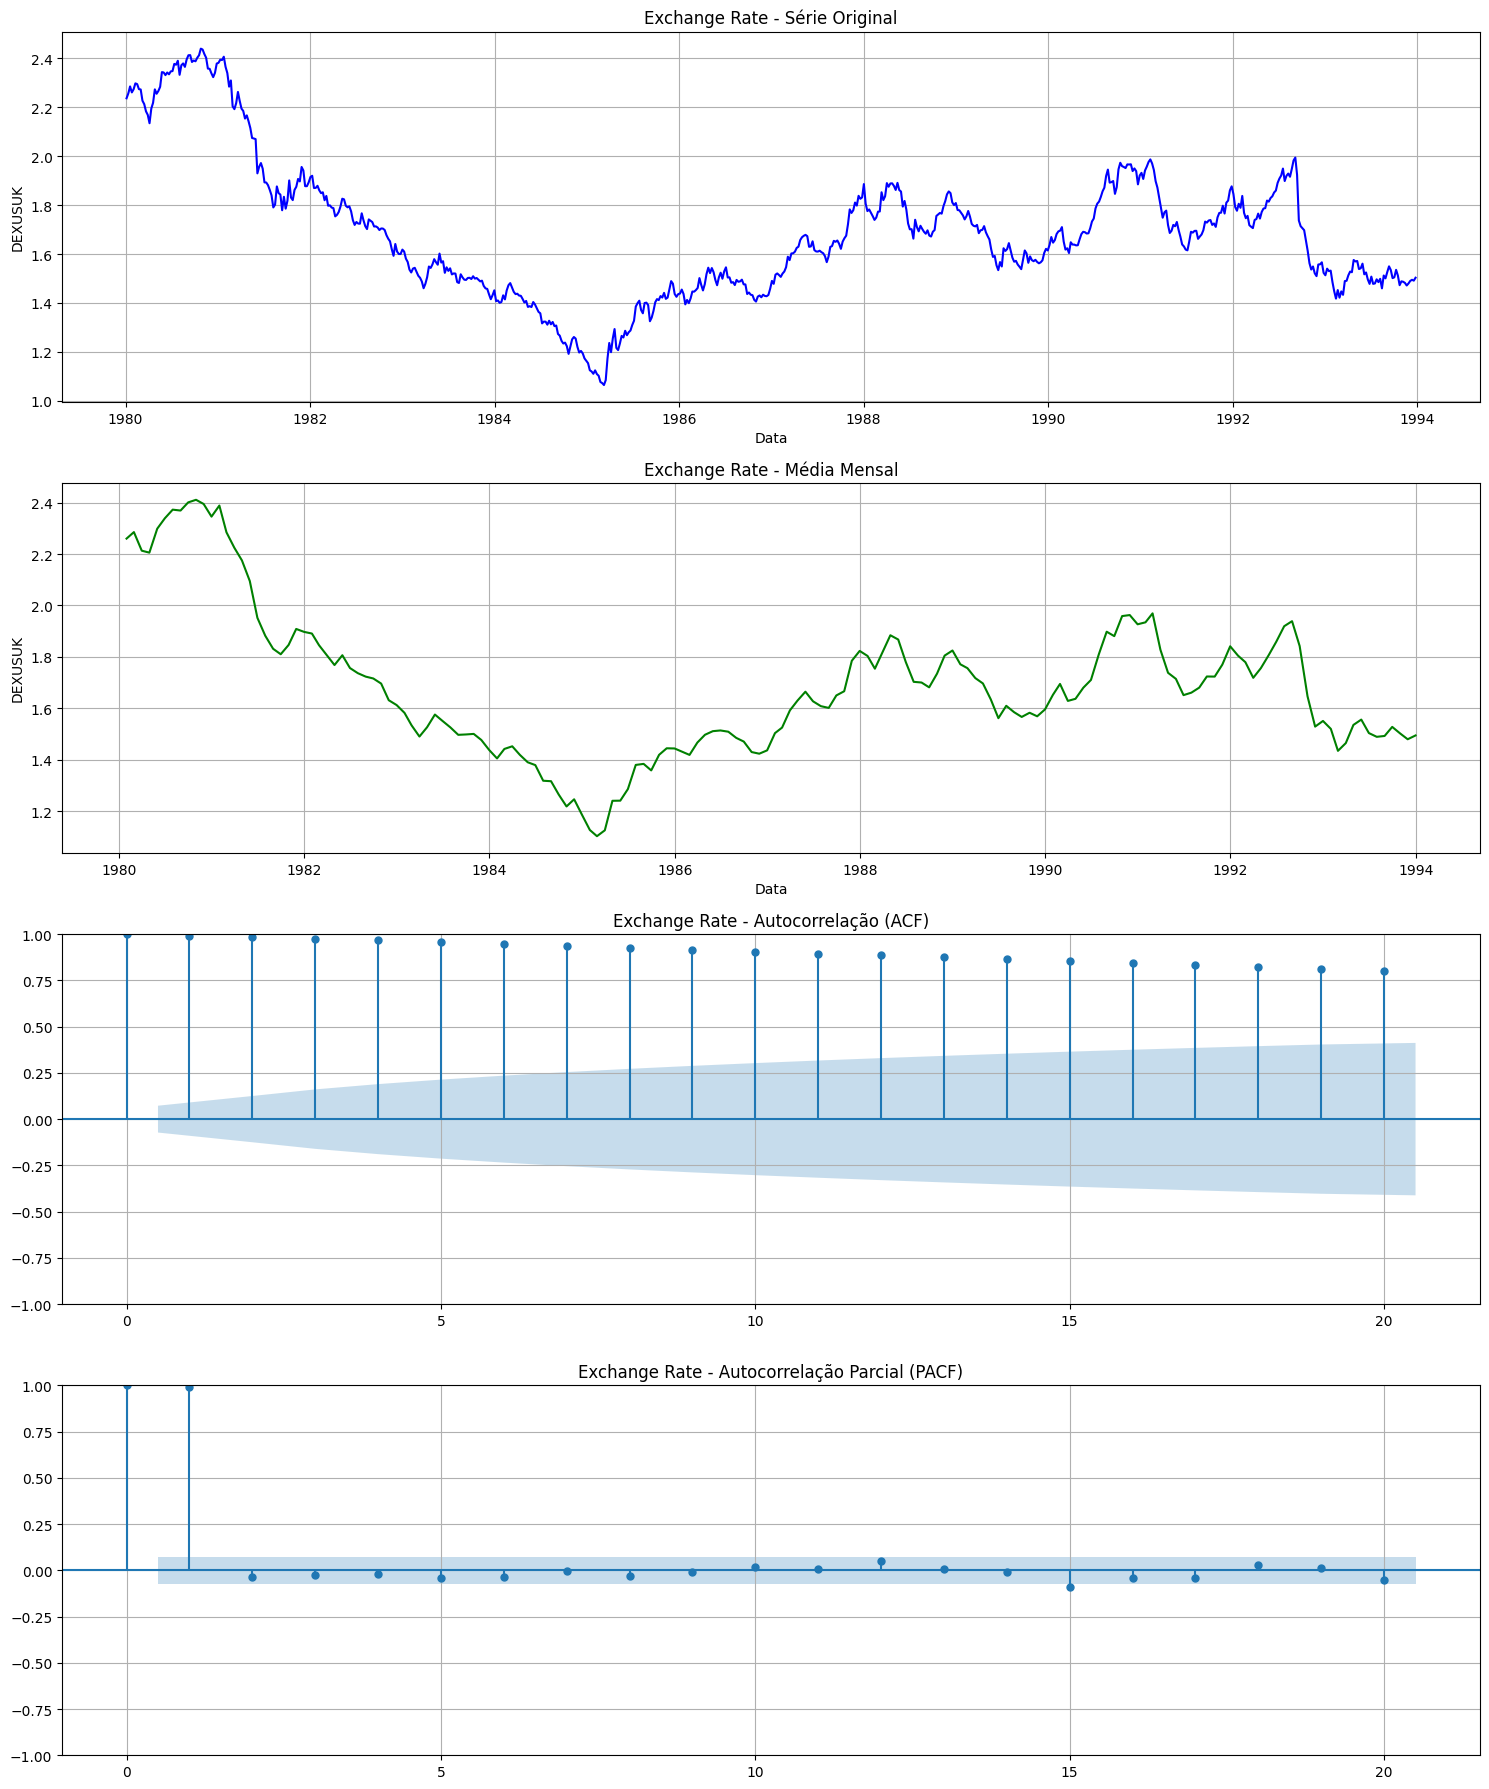

<ipython-input-36-e003234beb60>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie_mensal = serie.resample('M').mean()


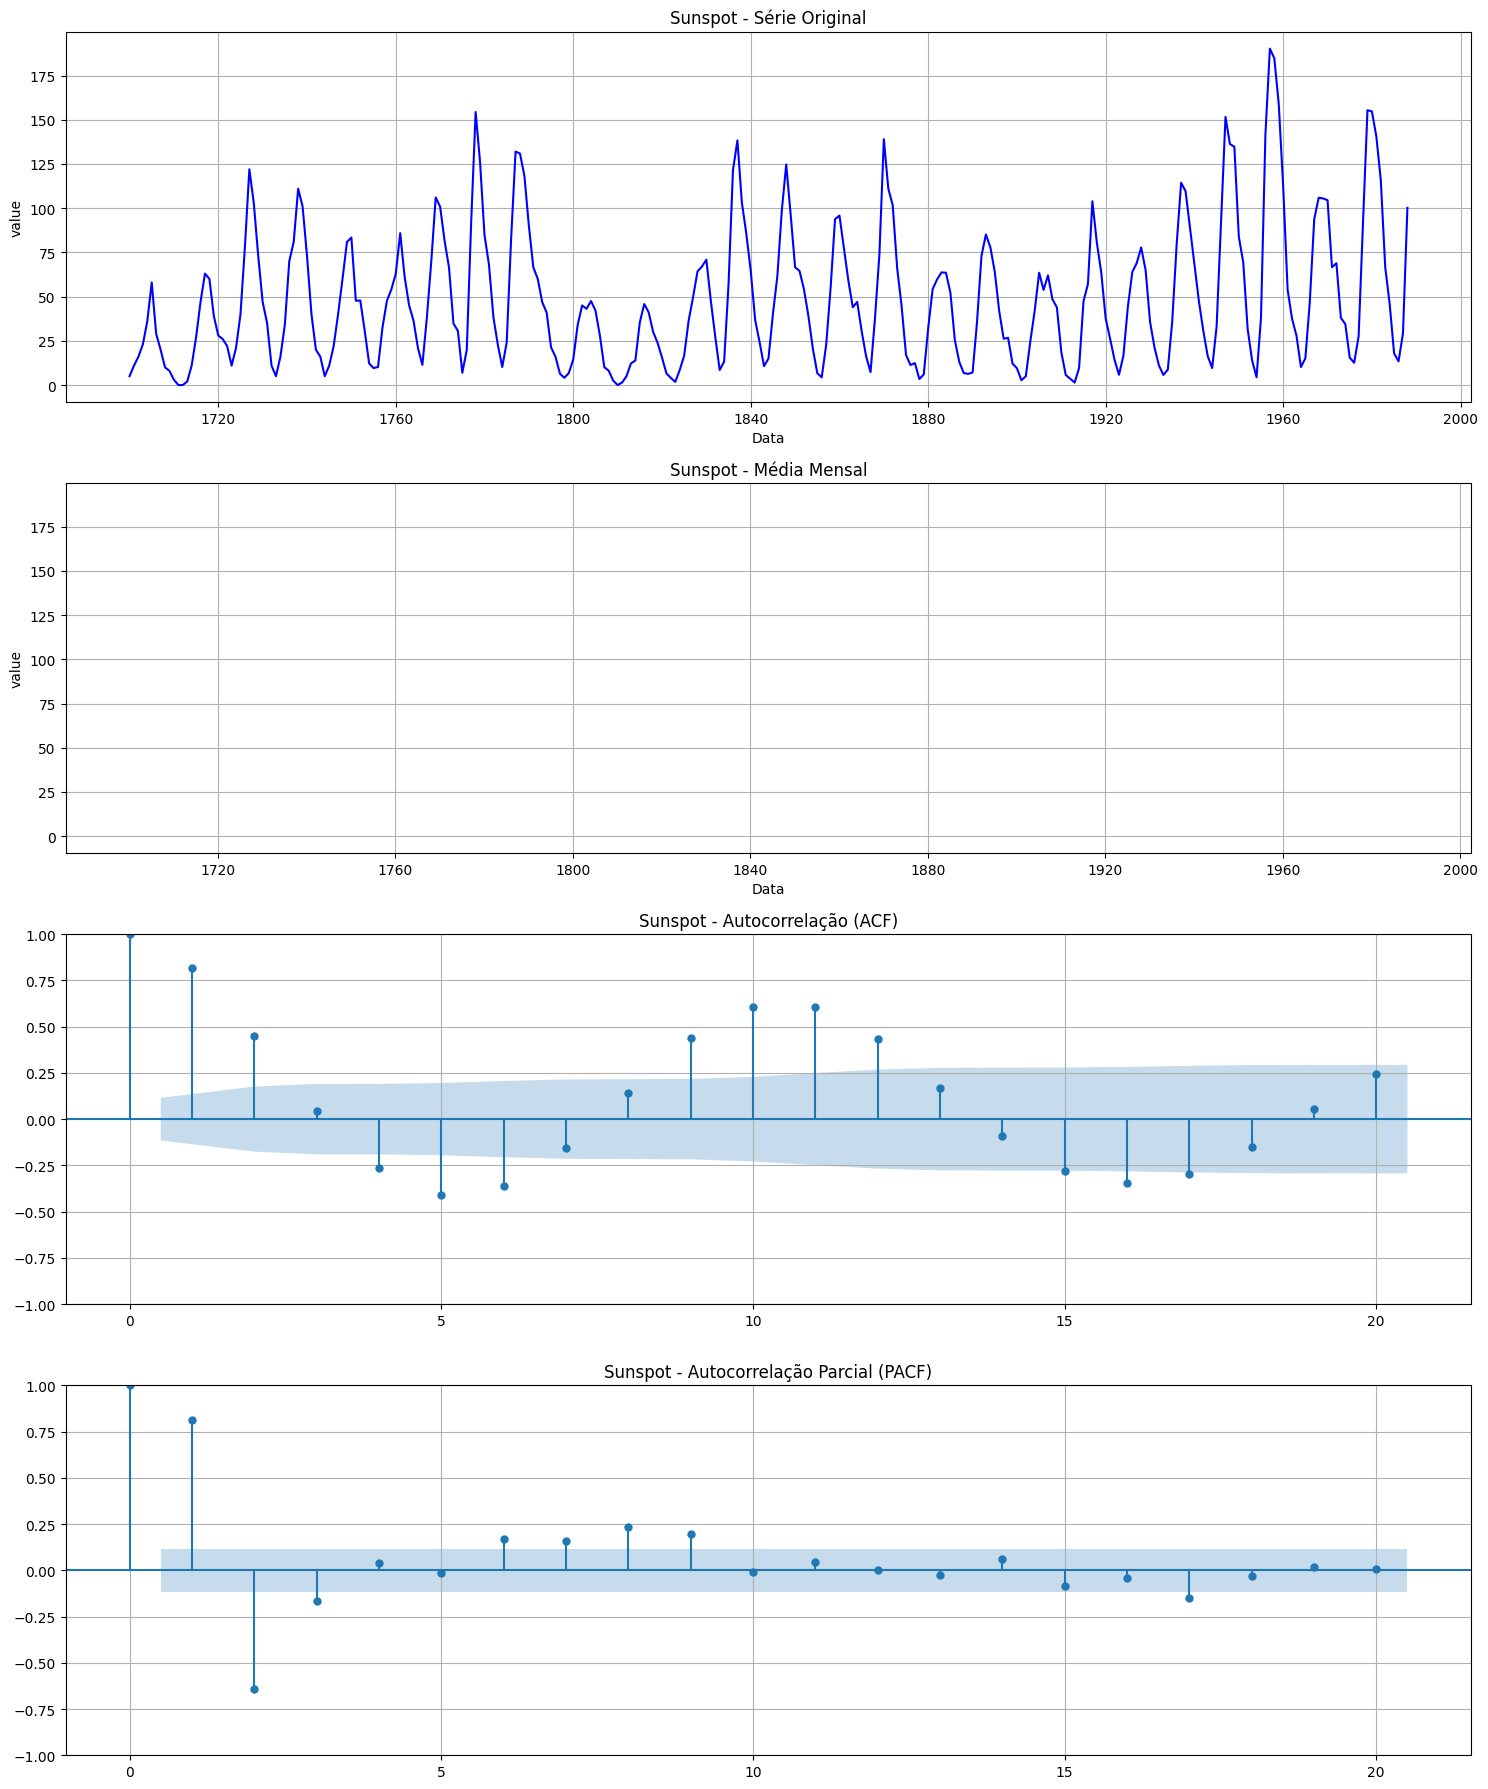

<ipython-input-36-e003234beb60>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie_mensal = serie.resample('M').mean()


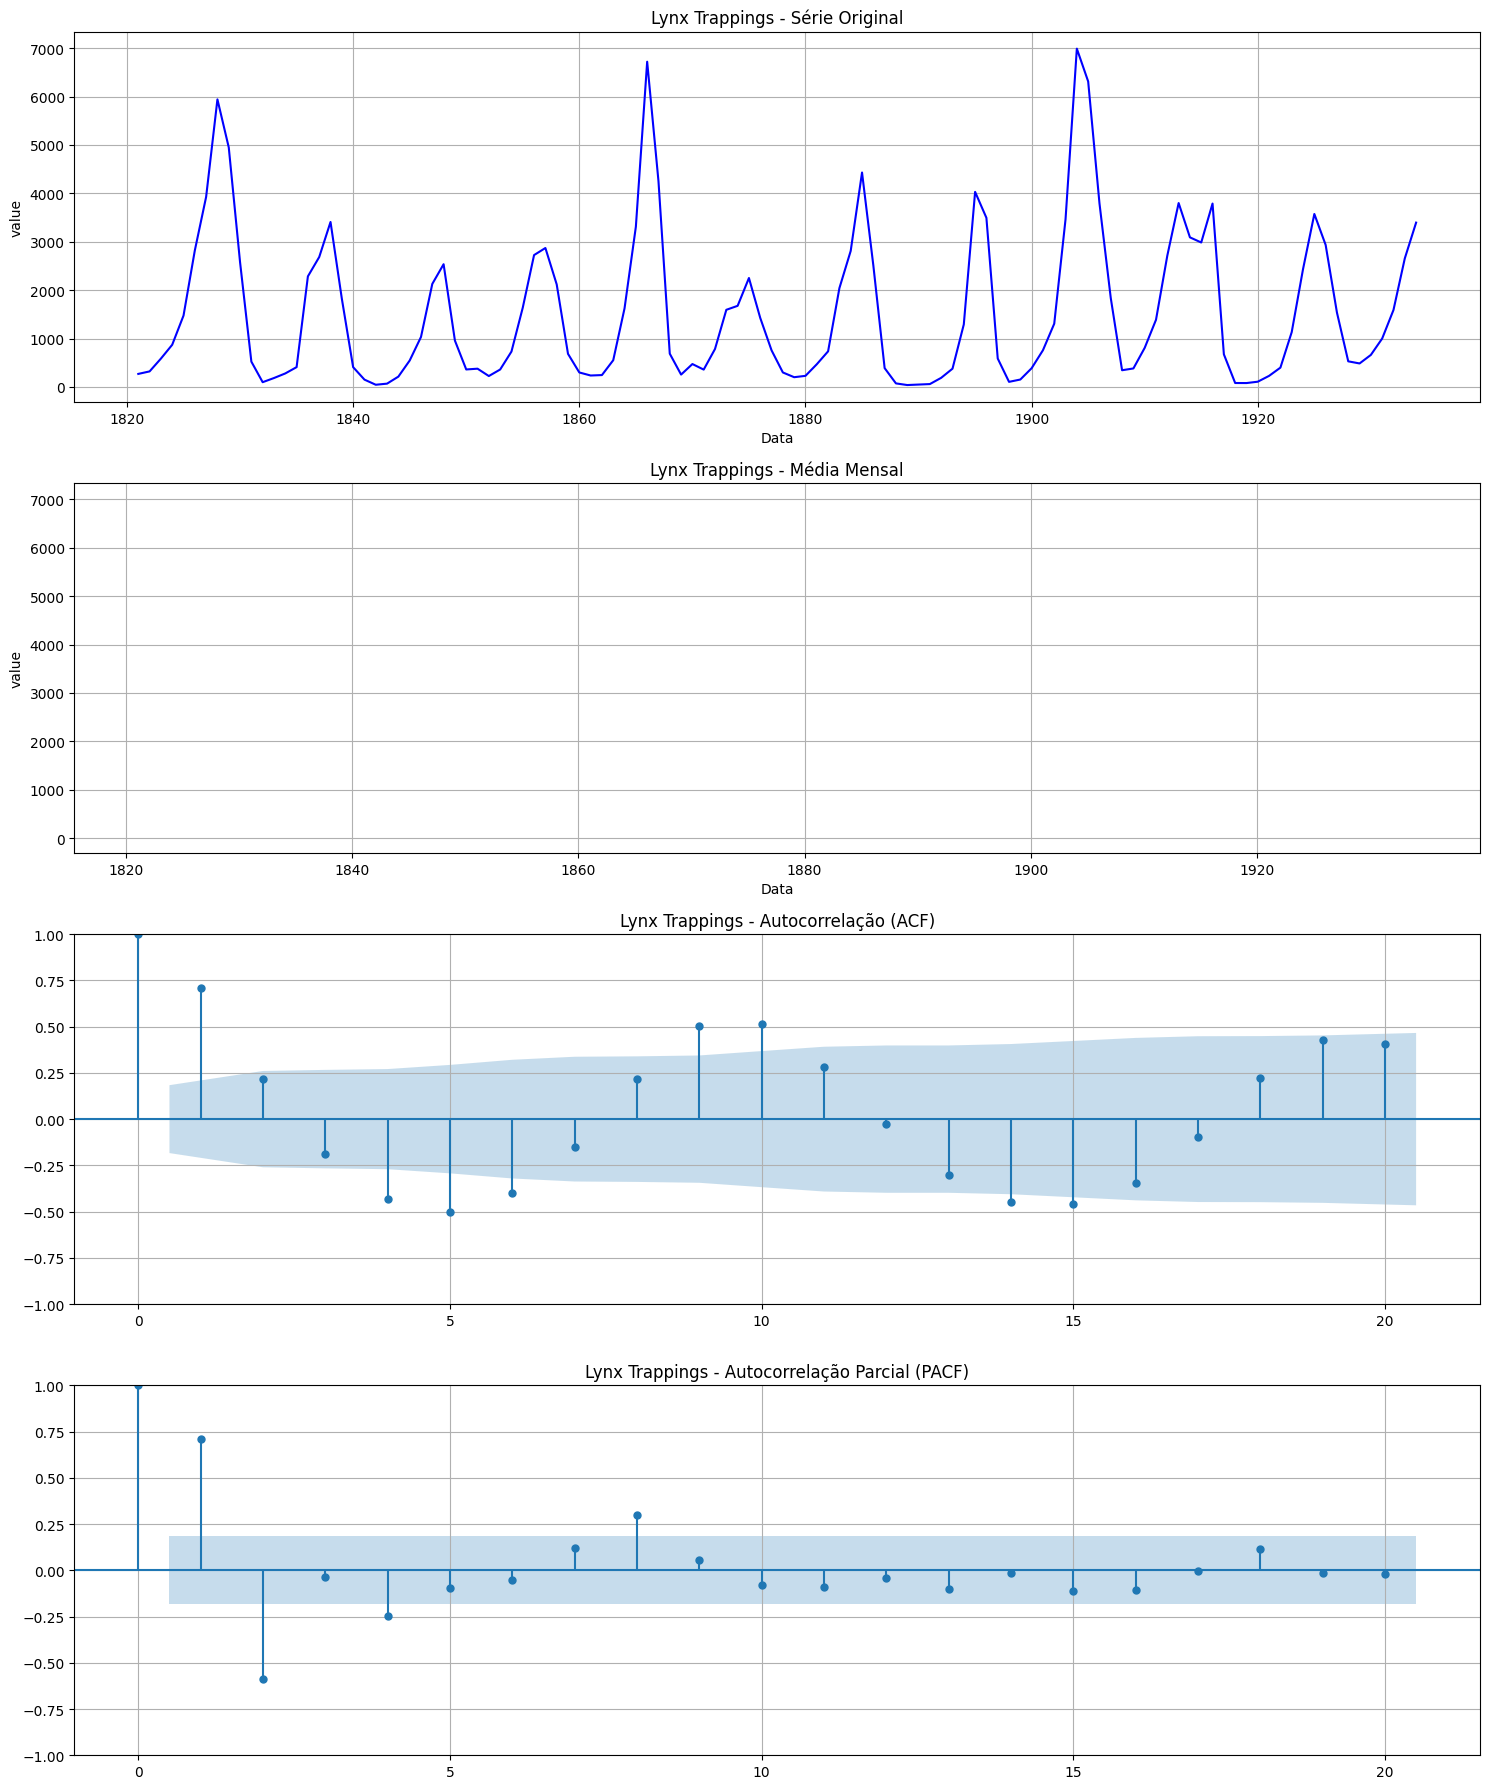

<ipython-input-36-e003234beb60>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie_mensal = serie.resample('M').mean()


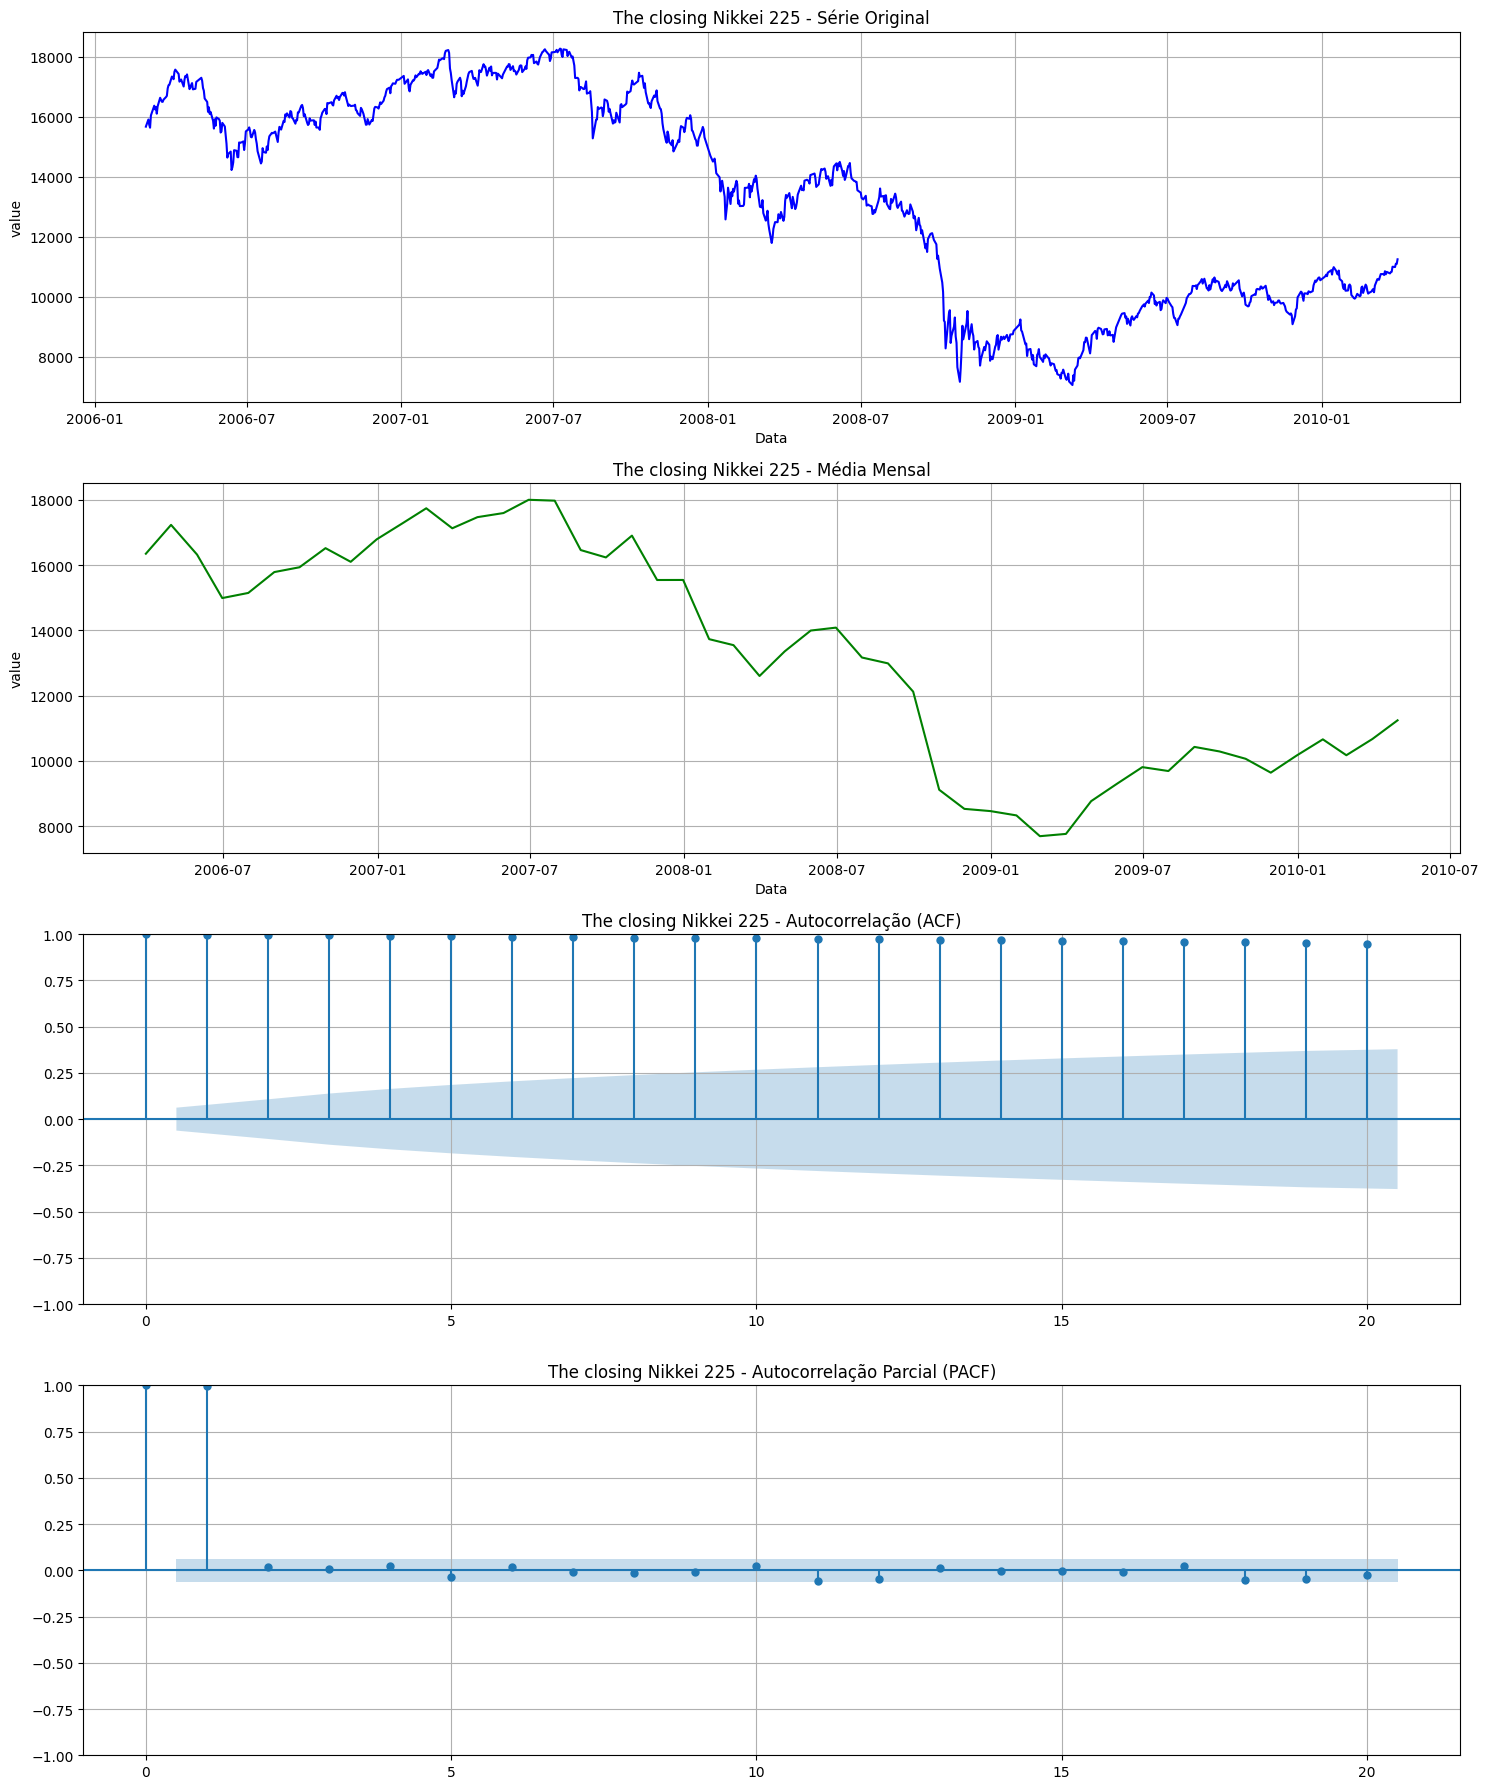

In [37]:
for df, nome in zip(list_data, nomes_series):
    gerar_graficos_temporais(df, nome)

#treinamento

In [38]:
##treinamento
train_sunpot_data = sunpot_data.loc['1700':'1920']
train_lynx_data = lynx_data.loc['1821':'1920']
train_exchangerate_data=exchange_data.loc['1980':'1992'] #weekly
train_nikkie225_data=nikkei225_data.loc['2006/03/03':'2009/06/05']

test_lynx_data = lynx_data.loc['1921':'1934']
test_sunpot_data = sunpot_data.loc['1921':'1987']
test_exchangerate_data=exchange_data.loc['1993']
test_nikkie225_data=nikkei225_data.loc['2009/06/06 ':'2010/04/01']

#normaliza√ß√£o

In [ ]:
scaler_pm10 = MinMaxScaler()

scaler_pm10.fit(train_data['Time_PM10'].values.reshape(-1, 1))

In [ ]:
train_data_normalized = train_data.copy()

train_data_normalized['Time_PM10'] = scaler_pm10.transform(train_data['Time_PM10'].values.reshape(-1, 1))

test_data_normalized = test_data.copy()

test_data_normalized['Time_PM10'] = scaler_pm10.transform(test_data['Time_PM10'].values.reshape(-1, 1))

In [ ]:
# Para o conjunto de treinamento
for column in train_data_normalized.columns:
    acf_pacf(train_data_normalized[column], lags=30, title_prefix=f"Treinamento: {column}")

In [ ]:

train_pm10=train_data_normalized['Time_PM10']


test_pm10 =test_data_normalized['Time_PM10']

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_so2_diff)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] < 0.05:
    print("A s√©rie diferenciada √© estacion√°ria.")
else:
    print("A s√©rie ainda n√£o √© estacion√°ria.")

#decomposi√ß√£o

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Iterar por cada coluna do DataFrame
for coluna in df.columns:
    print(f"Analisando sazonalidade para a coluna: {coluna}")
    serie_temporal = df[coluna]

    # Realizar decomposi√ß√£o sazonal (ajuste o per√≠odo, ex.: 12 para dados mensais)
    decomposicao = seasonal_decompose(serie_temporal, model='additive', period=12)

    # Plotar os componentes
    decomposicao.plot()
    plt.suptitle(f"Decomposi√ß√£o Sazonal - {coluna}", y=1.02)
    plt.show()

#janelamento

#arima model
>

A diferencia√ß√£o (d no ARIMA) √© o principal m√©todo para alcan√ßar a estacionariedade quando h√° tend√™ncias ou sazonalidade estoc√°stica. O teste de Dickey-Fuller Aumentado (ADF) √© uma forma formal de verificar a necessidade de diferencia√ß√£o (testa a presen√ßa de raiz unit√°ria)

>  

as fun√ß√µes de autocorrela√ß√£o (ACF) e autocorrela√ß√£o parcial (PACF) s√£o as ferramentas prim√°rias para identificar as ordens (p, q, P, Q) de modelos ARMA/SARIMA ap√≥s a s√©rie ser tornada estacion√°ria




In [ ]:
def ajustar_ar(serie, p):
    """
    Ajusta um modelo AR(p) usando m√≠nimos quadrados.
    """
    Y = serie[p:].values  # target
    X = np.column_stack([serie.shift(i).dropna().values[-len(Y):] for i in range(1, p+1)])

    # Adiciona intercepto (bias)
    X = np.column_stack([np.ones(len(Y)), X])

    # Estimativa por m√≠nimos quadrados: œÜ = (X·µÄX)‚Åª¬πX·µÄY
    coeficientes = np.linalg.inv(X.T @ X) @ X.T @ Y
    return coeficientes


In [ ]:
p = 2
phi = ajustar_ar(serie_diff, p)
print("Coeficientes AR:", phi)


In [ ]:
def prever_ar(serie, coeficientes, p):
    """
    Gera previs√µes com o modelo AR(p).
    """
    previsoes = []
    serie_vals = list(serie[-p:].values)

    for _ in range(10):  # exemplo: prever 10 passos √† frente
        x = [1] + serie_vals[-p:]  # 1 para o bias
        pred = np.dot(coeficientes, x)
        previsoes.append(pred)
        serie_vals.append(pred)
    return previsoes


In [ ]:
last_real = exchange_data['DEXUSUK'].dropna().iloc[-1]  # √∫ltimo valor antes da previs√£o
previsoes_final = np.cumsum(prever_ar(serie_diff, phi, p)) + last_real


In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(exchange_data.index[-50:], exchange_data['DEXUSUK'].iloc[-50:], label="Hist√≥rico real")
plt.plot(pd.date_range(exchange_data.index[-1], periods=10, freq='W'), previsoes_final, label="Previs√£o", color='orange')
plt.legend()
plt.title("Previs√£o Manual ARIMA(p,d,q)")
plt.grid(True)
plt.show()


#o que deve ser feito de acordo com o que esta escrito no artigo selecionado

In [ ]:
#o que deve ser feito
"""
explicar como realizar o projeto descrito no artigo "Sequence in Hybridization of Statistical and Intelligent Models in Time Series Forecasting". O objetivo principal do projeto √© comparar a performance de modelos h√≠bridos de s√©ries temporais, especificamente as abordagens sequenciais **Linear‚ÄìN√£o Linear** e **N√£o Linear‚ÄìLinear**, utilizando modelos estat√≠sticos (ARIMA) e inteligentes (MLP/SVM).

O projeto envolve a implementa√ß√£o e avalia√ß√£o de duas sequ√™ncias principais de modelagem:

**1. Sequ√™ncia Linear‚ÄìN√£o Linear (Exemplo: ARIMA-MLP)**

Esta abordagem come√ßa modelando a parte linear da s√©rie temporal e depois modela a parte n√£o linear restante nos res√≠duos.

*   **Passo 1: Modelagem Linear (ARIMA) nos Dados Originais**
    *   **Entrada:** A s√©rie temporal original ("row data").
    *   **Objetivo:** Capturar e modelar os padr√µes lineares na s√©rie.
    *   **Processo:** Aplique o ciclo padr√£o de modelagem ARIMA:
        *   **Identifica√ß√£o:** Determine as ordens (p, d, q) do modelo ARIMA. Isso geralmente envolve primeiro tornar a s√©rie estacion√°ria, tipicamente por **diferencia√ß√£o** (`d` vezes). Ferramentas como o software ITSM podem ajudar na an√°lise visual da s√©rie e na aplica√ß√£o de transforma√ß√µes ou diferencia√ß√µes. Use as fun√ß√µes de autocorrela√ß√£o (ACF) e autocorrela√ß√£o parcial (PACF) da s√©rie (diferenciada, se necess√°rio) para sugerir os valores apropriados de p e q. O ITSM pode plotar ACF/PACF.
        *   **Estima√ß√£o:** Estime os par√¢metros (œÜ, Œ∏, œÉ¬≤) do modelo ARIMA(p, d, q) escolhido. A estima√ß√£o por M√°xima Verossimilhan√ßa (Maximum Likelihood Estimation - MLE) √© um m√©todo comum. ITSM oferece op√ß√µes para estima√ß√£o preliminar (como Yule-Walker, Burg) e MLE, incluindo uma fun√ß√£o Autofit que busca o modelo com menor crit√©rio AICC.
        *   **Verifica√ß√£o Diagn√≥stica:** Avalie a adequa√ß√£o do modelo ARIMA ajustado, principalmente analisando seus res√≠duos. Os res√≠duos devem se assemelhar a um ru√≠do branco (s√©rie sem autocorrela√ß√£o significativa). Embora o objetivo seja usar esses res√≠duos no pr√≥ximo passo, verificar se o modelo linear √© adequado ajuda a garantir que ele capturou a estrutura linear esperada.
    *   **Sa√≠da:** Um modelo ARIMA ajustado e a s√©rie de res√≠duos gerada por este modelo (`√™ARIMA,t`). Estes res√≠duos s√£o considerados como contendo os padr√µes n√£o lineares.

*   **Passo 2: Modelagem N√£o Linear (Exemplo: MLP) nos Res√≠duos do ARIMA**
    *   **Entrada:** Os res√≠duos (`√™ARIMA,t`) do modelo ARIMA ajustado no Passo 1.
    *   **Objetivo:** Modelar os padr√µes n√£o lineares ou as rela√ß√µes remanescentes que o modelo ARIMA n√£o conseguiu explicar.
    *   **Processo:** Ajuste um modelo n√£o linear, como uma Rede Neural Artificial do tipo Multilayer Perceptron (MLP) ou uma Support Vector Machine (SVM), aos res√≠duos do ARIMA. No caso da MLP, os res√≠duos ARIMA servem como dados de entrada para o treinamento. A estrutura da MLP (n√∫mero de camadas, neur√¥nios, lags de entrada) deve ser determinada, frequentemente por um processo de otimiza√ß√£o, testando diferentes topologias e escolhendo aquela que minimiza o erro (e.g., MSE) em dados de teste.
    *   **Sa√≠da:** Um modelo n√£o linear treinado capaz de prever ou modelar os res√≠duos do ARIMA (`ƒâ2`).

*   **Passo 3: Previs√£o Combinada**
    *   A previs√£o final (`fÃÇcombined,t`) √© obtida **somando a previs√£o do modelo ARIMA** (feita para a s√©rie original usando o modelo ajustado no Passo 1, referida como `ƒâ1` na nota√ß√£o do artigo) **e a previs√£o do modelo n√£o linear** (feita para os res√≠duos do ARIMA usando o modelo ajustado no Passo 2, referida como `ƒâ2` na nota√ß√£o do artigo). Ou seja, `fÃÇcombined,t = ƒâ1 + ƒâ2`.

**2. Sequ√™ncia N√£o Linear‚ÄìLinear (Exemplo: MLP-ARIMA)**

Esta abordagem inverte a ordem, primeiro modelando a parte n√£o linear e depois a parte linear nos res√≠duos.

*   **Passo 1: Modelagem N√£o Linear (Exemplo: MLP) nos Dados Originais**
    *   **Entrada:** A s√©rie temporal original ("row data").
    *   **Objetivo:** Capturar e modelar os padr√µes n√£o lineares na s√©rie primeiro.
    *   **Processo:** Ajuste um modelo n√£o linear (MLP ou SVM) diretamente nos dados originais. Determine a estrutura ideal do modelo n√£o linear.
    *   **Sa√≠da:** Um modelo n√£o linear treinado e a s√©rie de res√≠duos gerada por este modelo (`√™MLP,t`).

*   **Passo 2: Modelagem Linear (ARIMA) nos Res√≠duos do Modelo N√£o Linear**
    *   **Entrada:** Os res√≠duos (`√™MLP,t`) do modelo n√£o linear ajustado no Passo 1. Estes res√≠duos s√£o considerados como contendo os padr√µes lineares n√£o capturados pelo modelo n√£o linear.
    *   **Objetivo:** Modelar os padr√µes lineares ou as rela√ß√µes remanescentes nos res√≠duos.
    *   **Processo:** Aplique o ciclo padr√£o de modelagem ARIMA (Identifica√ß√£o, Estima√ß√£o, Verifica√ß√£o Diagn√≥stica) aos res√≠duos do modelo n√£o linear (`√™MLP,t`). Isso inclui a diferencia√ß√£o dos res√≠duos, se necess√°rio, para atingir a estacionariedade antes de identificar e estimar o modelo ARMA para os res√≠duos.
    *   **Sa√≠da:** Um modelo ARIMA ajustado para os res√≠duos do modelo n√£o linear.

*   **Passo 3: Previs√£o Combinada**
    *   A previs√£o final √© obtida **somando a previs√£o do modelo n√£o linear** (feita para a s√©rie original usando o modelo ajustado no Passo 1, referida como `ƒâ2` nesta sequ√™ncia) **e a previs√£o do modelo ARIMA** (feita para os res√≠duos do modelo n√£o linear usando o modelo ajustado no Passo 2, referida como `ƒâ1` nesta sequ√™ncia). A f√≥rmula combinada √© `fÃÇcombined,t = ƒâ1 + ƒâ2`.

**Avalia√ß√£o e Compara√ß√£o**

Ap√≥s implementar ambas as sequ√™ncias e obter as previs√µes combinadas para um conjunto de dados de teste, compare a performance usando m√©tricas de erro como MSE, MAE e MAPE, bem como a correla√ß√£o entre valores reais e previstos. O artigo sugere que a sequ√™ncia N√£o Linear‚ÄìLinear (MLP-ARIMA ou SVM-ARIMA) tende a produzir resultados mais precisos.

Em suma, o projeto envolve a aplica√ß√£o sequencial de um modelo linear e um modelo n√£o linear, em duas ordens diferentes, usando os res√≠duos da primeira etapa como entrada para a segunda. A implementa√ß√£o de cada modelo (ARIMA, MLP, SVM) segue os procedimentos padr√£o (como identifica√ß√£o, estima√ß√£o e verifica√ß√£o para ARIMA), adaptados para a entrada espec√≠fica (dados originais ou res√≠duos) em cada passo da sequ√™ncia h√≠brida.
"""

#referencia

In [ ]:
#https://github.com/liannewriting/YouTube-videos-public/tree/main/arima-model-time-series-prediction-python
#https://www.youtube.com/watch?v=Rl_tMSc_wKo
#https://medium.com/data-science/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6
#https://towardsdatascience.com/understanding-arima-time-series-modeling-d99cd11be3f8/
#https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd
#https://medium.com/@mouse3mic3/estimating-arima-and-sarima-coefficients-using-genetic-algorithm-03f24ab66589
#https://www.kaggle.com/discussions/questions-and-answers/199346
#https://www.datacamp.com/tutorial/arima
#https://arxiv.org/pdf/2504.08940
#https://www.kaggle.com/code/chanakyavivekkapoor/decomposing-time-series-data
#https://medium.com/analytics-vidhya/arima-model-from-scratch-in-python-489e961603ce